In [37]:
import yaml
import os
from pytorch3dunet.augment.transforms import Transformer
import matplotlib.pyplot as plt
import numpy as np
import h5py
from ipywidgets import widgets
import matplotlib.pyplot as plt
from scipy import ndimage
%matplotlib inline

In [166]:
def load_case(i):
    f = h5py.File(f"{datapath}/{files[i]}", "r")
    return f["raw"][:], f["label"][:], f["labelMask"][:]


In [168]:
datapath = "data/train"

files = os.listdir(datapath)
print(files)

['A038_R.h5', 'A051_R.h5']


In [247]:
i = 0
img, mask, labelMask = load_case(i)

In [248]:
print("image shape:",img.shape)
print("labelMask shape:",labelMask.shape)

image shape: (220, 256, 256)
labelMask shape: (220, 256, 256)


In [26]:
# generate default heatmap
a_size=64*2
center= np.array([a_size/2,a_size/2,a_size/2])
res=np.zeros((a_size,a_size,a_size))
for x in range(a_size):
    print(x)
    for y in range(a_size):
        for z in range(a_size):
            a = np.array([x,y,z])         
            res[x,y,z] = np.linalg.norm(center-a)+1
res=1/res


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127


In [27]:
with open('test.npy', 'wb') as f:
    np.save(f,res)
with open('test.npy', 'rb') as f:
    a = np.load(f)

In [265]:
print("Memory size of numpy array in gigabytes:",
      a.size * a.itemsize*1e-9)

Memory size of numpy array in gigabytes: 1.073741824


In [259]:
a.shape

(128, 128, 128)

(102.53061224489795, 111.93877551020408)


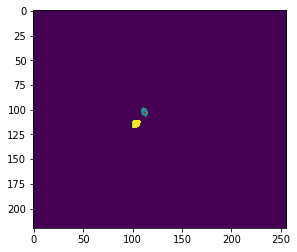

In [244]:
input_mask=labelMask.copy()[:,105]
input_mask[np.logical_and(input_mask!=1,input_mask!=0)]=0
n=ndimage.center_of_mass(input_mask)
plt.imshow(labelMask[:,105])
print(n)
plt.scatter(n[1],n[0],color='r',s=1)
plt.show()


In [256]:
end=np.zeros_like(input_mask)
for label in range(int(np.max(labelMask))):
    input_mask=labelMask.copy()
    input_mask[input_mask!=label+1]=0
    center_of_mass=np.asarray(np.round(ndimage.center_of_mass(input_mask)),dtype="int")
    print("center_of_mass:",center_of_mass)
    
    hs=int(a_size/2)
    slices=[]
    res_slices=[]
    for i in range(3):
        start=0
        stop = res.shape[i]
        if center_of_mass[i]-hs<0:
            start=hs-center_of_mass[i]
        if center_of_mass[i]+hs>end.shape[i]:
            stop=res.shape[i]-(center_of_mass[i]+hs-end.shape[i])
        slices.append( slice(max(0,center_of_mass[i]-hs),min(center_of_mass[i]+hs,end.shape[i])))
        res_slices.append(slice(start,stop))
    print(slices)
    print(res_slices)
    end[slices[0],slices[1],slices[2]]+=res[res_slices[0],res_slices[1],res_slices[2]]

center_of_mass: [102 101 113]
[slice(38, 166, None), slice(37, 165, None), slice(49, 177, None)]
[slice(0, 128, None), slice(0, 128, None), slice(0, 128, None)]
center_of_mass: [115 107 103]
[slice(51, 179, None), slice(43, 171, None), slice(39, 167, None)]
[slice(0, 128, None), slice(0, 128, None), slice(0, 128, None)]
center_of_mass: [121 117 107]
[slice(57, 185, None), slice(53, 181, None), slice(43, 171, None)]
[slice(0, 128, None), slice(0, 128, None), slice(0, 128, None)]


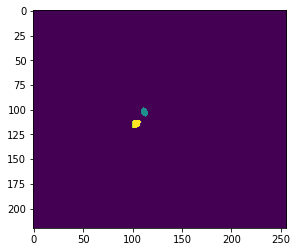

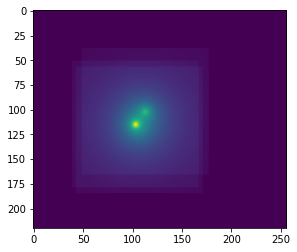

In [255]:
plt.imshow(labelMask[:,105])
plt.show()
plt.imshow(end[:,105])
plt.show()


In [95]:
end[75:125,105]

[ 91 126  71]
[ 66 101  46]


In [292]:
a = np.array([[[2,7], [3,6], [4,3]], [[1,9], [5,7], [2,1]]])

In [296]:
def foo(row):
    print(row,"t")
    u = np.unique(row)
    return len(u)
b = np.apply_along_axis(foo, 1, a.reshape((a.shape[0],-1)))
print(b)

[[2 7 3 6 4 3]
 [1 9 5 7 2 1]]
[2 7 3 6 4 3] t
[1 9 5 7 2 1] t
[5 5]


In [6]:
from pytorch3dunet.unet3d.metrics import Acc
import torch
import numpy as np

In [3]:
%load_ext autoreload
%autoreload 2

In [21]:
a=Acc()

target=np.array([[0,0,0,0,1,1,2,2],[0,0,0,0,1,1,2,2]])
prediction=np.array([[0,0,0,0,0,0,0,0],[0,0,0,0,0,1,1,0]])
a(torch.tensor(prediction),torch.tensor(target))

({'miss_classification': 1.0}, 0.5)

In [361]:
a(torch.tensor(prediction),torch.tensor(target))[0][0].item()

IndexError: invalid index to scalar variable.

In [25]:
if torch.isnan(torch.tensor(float(1))):
    print("HALLO")